In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(filepath_or_buffer="archives/euro-dollar-clean.csv",
                 usecols=["year", "month", "dollar"])
df

,year,month,dollar
0,2021,9,1.1711
1,2021,9,1.1780
2,2021,9,1.1763
3,2021,9,1.1824
4,2021,9,1.1814
...,...,...,...
3004,2010,1,1.4304
3005,2010,1,1.4350
3006,2010,1,1.4442
3007,2010,1,1.4389


In [3]:
meses_legibles = {
    1 : "ENE", 2 : "FEB" , 3 : "MAR" , 4 : "ABR", 5 : "MAY" , 6 : "JUN" , 7 : "JUL" , 8 : "AGO" , 9 : "SEP" , 10 : "OCT" , 11 : "NOV" , 12 : "DEC"
}
df.month = df["month"].map(meses_legibles)

meses = ["ENE", "FEB", "MAR", "ABR", "MAY", "JUN", 
          "JUL", "AGO", "SEP", "OCT", "NOV", "DEC"]
df['month'] = pd.Categorical(df['month'], categories=meses, ordered=True)

df

,year,month,dollar
0,2021,SEP,1.1711
1,2021,SEP,1.1780
2,2021,SEP,1.1763
3,2021,SEP,1.1824
4,2021,SEP,1.1814
...,...,...,...
3004,2010,ENE,1.4304
3005,2010,ENE,1.4350
3006,2010,ENE,1.4442
3007,2010,ENE,1.4389


In [4]:
df_r = df.groupby(["year", "month"])["dollar"].mean().unstack()
df_r

C:\Users\nicol\AppData\Local\Temp\ipykernel_16496\1675130646.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_r = df.groupby(["year", "month"])["dollar"].mean().unstack()


month,ENE,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SEP,OCT,NOV,DEC
year,,,,,,,,,,,,
2010,1.359248,1.368570,1.356852,1.218700,1.256533,1.220850,1.277000,1.289418,1.306700,1.389781,1.366095,1.322013
2011,1.335967,1.364895,1.399917,1.306638,1.434864,1.438841,1.426429,1.434322,1.377000,1.370633,1.355573,1.258000
2012,1.290486,1.322410,1.320100,1.190824,1.223287,1.252629,1.228845,1.239996,1.285570,1.297417,1.282773,1.311937
2013,1.328805,1.335905,1.296360,1.302600,1.298205,1.318875,1.308013,1.330950,1.334790,1.363496,1.349290,1.370360
2014,1.361023,1.365850,1.382252,1.381250,1.373214,1.359238,1.353917,1.331610,1.290136,1.267274,1.247220,1.233133
2015,1.162133,1.134965,1.083768,1.077930,1.114955,1.121323,1.099578,1.113905,1.122118,1.123509,1.073600,1.087718
2016,1.085965,1.109295,1.109967,1.133919,1.131109,1.122891,1.106852,1.121174,1.121209,1.102605,1.079895,1.054290
2017,1.061441,1.064265,1.068470,1.072267,1.105750,1.122945,1.151114,1.180674,1.191457,1.175586,1.173800,1.183621
2018,1.219950,1.234780,1.233619,1.227630,1.181223,1.167829,1.168573,1.154896,1.165870,1.148404,1.136686,1.138421


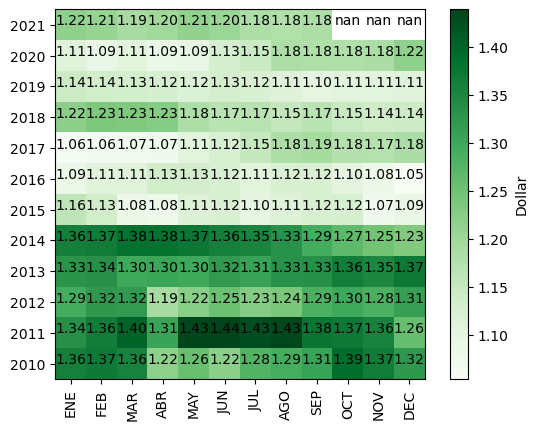

In [5]:
fig, ax =plt.subplots()

x = df_r.columns
y = df_r.index

for i in range(len(y)):
    for j in range(len(x)):
        valor = df_r.iloc[i, j]
        ax.text(j, i, f"{valor:.2f}", ha="center")

# ax.set_yticks [por defecto empieza en 1] pero nos interesa que empiece por el primer valor [0] por eso ponemos el range(len(x))
ax.set_xticks(range(len(x)))
ax.set_xticklabels(x, rotation=90)

ax.set_yticks(range(len(y)))
ax.set_yticklabels(y)

im = ax.imshow(df_r, cmap="Greens")
cbar = fig.colorbar(im, ax=ax, label="Dollar")

ax.invert_yaxis()